In [1]:
import os
import numpy as np
import pandas as pd
from random import seed
from random import randint
from IPython.display import Image, Audio
#from PIL import Image
import pickle
import copy
from music21 import *
import music21 as m21
from google.colab import files
import re

In [2]:
!yes | add-apt-repository ppa:mscore-ubuntu/mscore3-stable
!apt update
!apt install musescore3
print("MuseScore installation finished")

!pip uninstall music21
!pip install music21
#from music21 import note


from music21 import *
import music21 as m21

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore3-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 3 RELEASES FOR UBUNTU 18.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
  sudo apt-get update
  sudo apt-get install musescore3

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be upda

In [3]:
# enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

!lilypond --version

installing lilypond...
Extracting templates from packages: 100%
GNU LilyPond 2.22.1

Copyright (c) 1996--2021 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



In [4]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
os.chdir("./gdrive/MyDrive/Ritm")

In [6]:
!pip install FPDF
from fpdf import FPDF

  Preparing metadata (setup.py) ... done
  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40703 sha256=3d0c09cda518331d4ba1cd8ce91903c93a7a48c073a6dcd212142aa4bd253220
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built FPDF


Option1 - using Musescore



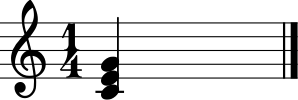


Option2 - Using LilyPond


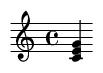

In [7]:
# displayin çalışıp çalışmadığını görmek için test kodu
print("Option1 - using Musescore\n")
c = chord.Chord("C4 E4 G4")
c.show()

print("\nOption2 - Using LilyPond")
c.write('lily.png')
filename=c.write('lily.png')
Image(filename)

In [8]:
level_1A_t = np.array([['Level1A', 1 , 0 , 0] , ['Level1A',1, 0, 1] , ['Level1A',1 ,1 ,1] ])
df_triplet_1A = pd.DataFrame(level_1A_t, columns = ['Level' , 'Triplet-1','Triplet-2','Triplet-3'], index = ['T1', 'T2', 'T3'])
df_triplet_1A['Cell'] = df_triplet_1A.index
df_triplet_1A['Triplet-1'] = df_triplet_1A['Triplet-1'].astype(int)
df_triplet_1A['Triplet-2'] = df_triplet_1A['Triplet-2'].astype(int)
df_triplet_1A['Triplet-3'] = df_triplet_1A['Triplet-3'].astype(int)
df_triplet_1A['Q'] = df_triplet_1A['Triplet-1']+ df_triplet_1A['Triplet-2'] + df_triplet_1A['Triplet-3']
df_triplet_1A['WNBD'] = [0 , 3 ,6]
df_triplet_1A['Pressing'] = ["" , "" , ""]
df_triplet_1A

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q,WNBD,Pressing
T1,Level1A,1,0,0,T1,1,0,
T2,Level1A,1,0,1,T2,2,3,
T3,Level1A,1,1,1,T3,3,6,


In [9]:
level_1B_f = np.array([['Level1B',1, 0 , 0 , 0 ] , ['Level1B',0, 0, 1 , 0], ['Level1B',1 ,0 ,1, 0],
                      ['Level1B',1 ,0 ,1, 1] , ['Level1B',1 ,1 ,1, 0], ['Level1B',1 ,1 ,1, 1]])
df_fourth_1B = pd.DataFrame(level_1B_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'],
                           index = ['S1', 'S2', 'S3', 'S4' , 'S5', 'S6'])
df_fourth_1B['Cell'] = df_fourth_1B.index
df_fourth_1B['Straight-1'] = df_fourth_1B['Straight-1'].astype(int)
df_fourth_1B['Straight-2'] = df_fourth_1B['Straight-2'].astype(int)
df_fourth_1B['Straight-3'] = df_fourth_1B['Straight-3'].astype(int)
df_fourth_1B['Straight-4'] = df_fourth_1B['Straight-4'].astype(int)
df_fourth_1B['Q'] = df_fourth_1B['Straight-1']+df_fourth_1B['Straight-2']+df_fourth_1B['Straight-3']+df_fourth_1B['Straight-4']
df_fourth_1B['WNBD'] = [0 , 2 , 2 , 6, 6 , 10 ]
df_fourth_1B['Pressing'] = [0 , 5.5 ,1 , 5.5, 1 , 1]
df_fourth_1B

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q,WNBD,Pressing
S1,Level1B,1,0,0,0,S1,1,0,0.0
S2,Level1B,0,0,1,0,S2,1,2,5.5
S3,Level1B,1,0,1,0,S3,2,2,1.0
S4,Level1B,1,0,1,1,S4,3,6,5.5
S5,Level1B,1,1,1,0,S5,3,6,1.0
S6,Level1B,1,1,1,1,S6,4,10,1.0


In [10]:
level_2A_t = np.array([['Level2A', 1 , 0 , 0] , ['Level2A',1, 0, 1] , ['Level2A',1 ,1 ,1] , ['Level2A',1 ,1 ,0] ,
                      ['Level2A', 0 , 1 , 0] , ['Level2A',0, 1, 1] , ['Level2A',0 ,0 ,1]])
df_triplet_2A = pd.DataFrame(level_2A_t, columns = ['Level','Triplet-1','Triplet-2','Triplet-3'], index = ['T1', 'T2', 'T3','T4', 'T5', 'T6','T7'])
df_triplet_2A['Cell'] = df_triplet_2A.index
df_triplet_2A['Triplet-1'] = df_triplet_2A['Triplet-1'].astype(int)
df_triplet_2A['Triplet-2'] = df_triplet_2A['Triplet-2'].astype(int)
df_triplet_2A['Triplet-3'] = df_triplet_2A['Triplet-3'].astype(int)
df_triplet_2A['Q'] = df_triplet_2A['Triplet-1']+ df_triplet_2A['Triplet-2'] + df_triplet_2A['Triplet-3']
df_triplet_2A['WNBD'] = [0 , 3 , 6, 3, 3, 6, 3]
df_triplet_2A['Pressing'] = ["" , "" , "", "" , "" , "" , ""]
df_triplet_2A

,Level,Triplet-1,Triplet-2,Triplet-3,Cell,Q,WNBD,Pressing
T1,Level2A,1,0,0,T1,1,0,
T2,Level2A,1,0,1,T2,2,3,
T3,Level2A,1,1,1,T3,3,6,
T4,Level2A,1,1,0,T4,2,3,
T5,Level2A,0,1,0,T5,1,3,
T6,Level2A,0,1,1,T6,2,6,
T7,Level2A,0,0,1,T7,1,3,


In [11]:
level_2B_f = np.array([['Level2B', 1, 0, 0, 0], ['Level2B', 0, 0, 1, 0], ['Level2B', 1, 0, 1, 0], ['Level2B', 1, 0, 1, 1],
                      ['Level2B', 1, 1, 1, 0], ['Level2B', 1, 1, 1, 1], ['Level2B', 1, 0, 0, 1],
                      ['Level2B', 0, 1, 1, 0], ['Level2B', 0, 1, 0, 1], ['Level2B', 0, 0, 1, 1], ['Level2B', 1, 1, 0, 0],
                      ['Level2B', 1, 1, 0, 1], ['Level2B', 0, 0, 0, 1], ['Level2B', 0, 1, 0, 0]])

df_fourth_2B = pd.DataFrame(level_2B_f, columns = ['Level','Straight-1','Straight-2','Straight-3','Straight-4'],
                           index = ['S1', 'S2', 'S3', 'S4' , 'S5', 'S6', 'S7',
                                    'S8', 'S9', 'S10', 'S11' , 'S12', 'S13', 'S14'])
df_fourth_2B['Cell'] = df_fourth_2B.index
df_fourth_2B['Straight-1'] = df_fourth_2B['Straight-1'].astype(int)
df_fourth_2B['Straight-2'] = df_fourth_2B['Straight-2'].astype(int)
df_fourth_2B['Straight-3'] = df_fourth_2B['Straight-3'].astype(int)
df_fourth_2B['Straight-4'] = df_fourth_2B['Straight-4'].astype(int)
df_fourth_2B['Q'] = df_fourth_2B['Straight-1']+df_fourth_2B['Straight-2']+df_fourth_2B['Straight-3']+df_fourth_2B['Straight-4']
df_fourth_2B['WNBD'] = [0 , 2 , 2 , 6, 6 , 10, 4, 6, 8, 6, 4, 8 , 4 , 4]
df_fourth_2B['Pressing'] = [0 , 5.5 ,1 , 5.5, 1 , 1, 4.5, 6.5, 10, 5.5, 2.5, 4.5, 7.5, 7.5 ]
df_fourth_2B

,Level,Straight-1,Straight-2,Straight-3,Straight-4,Cell,Q,WNBD,Pressing
S1,Level2B,1,0,0,0,S1,1,0,0.0
S2,Level2B,0,0,1,0,S2,1,2,5.5
S3,Level2B,1,0,1,0,S3,2,2,1.0
S4,Level2B,1,0,1,1,S4,3,6,5.5
S5,Level2B,1,1,1,0,S5,3,6,1.0
S6,Level2B,1,1,1,1,S6,4,10,1.0
S7,Level2B,1,0,0,1,S7,2,4,4.5
S8,Level2B,0,1,1,0,S8,2,6,6.5
S9,Level2B,0,1,0,1,S9,2,8,10.0
S10,Level2B,0,0,1,1,S10,2,6,5.5


In [12]:
triplet = note.Note('B4')
triplet.duration = duration.Duration(1.0/3.0)

tripletes = note.Rest()
tripletes.duration = duration.Duration(1.0/3.0)

triplettriplet = note.Note('B4')
triplettriplet.duration = duration.Duration(2.0/3.0)

triplettripletes = note.Rest()
triplettripletes.duration = duration.Duration(2.0/3.0)

q = note.Note('B4')
q.duration.type = 'quarter'

qes = note.Rest()
qes.duration.type = 'quarter'

eight = note.Note('B4')
eight.duration = duration.Duration(0.5)

eightes = note.Rest()
eightes.duration = duration.Duration(0.5)

qdot = note.Note('B4')
qdot.duration = duration.Duration(1.5)

qdotes = note.Rest()
qdotes.duration = duration.Duration(1.5)

eightdot = note.Note('B4')
eightdot.duration = duration.Duration(0.75)

eightdotes = note.Rest()
eightdotes.duration = duration.Duration(0.75)

sixteenth = note.Note('B4')
sixteenth.duration = duration.Duration(0.25)

sixteenthes = note.Rest()
sixteenthes.duration = duration.Duration(0.25)

In [13]:
def firstbeatcontrol(seviye, opsiyon, ritim_list_tbc):
    if (seviye==1 and (ritim_list_tbc[0]=="S2")):
        first_beat = True
    elif (seviye==2 and opsiyon==1 and (ritim_list_tbc[0]=="T5" or ritim_list_tbc[0]=="T6" or ritim_list_tbc[0]=="T7")):
        first_beat = True
    elif (seviye==2 and opsiyon==2 and (ritim_list_tbc[0]=="S2" or ritim_list_tbc[0]=="S8" or ritim_list_tbc[0]=="S9" or ritim_list_tbc[0]=="S10" or ritim_list_tbc[0]=="S13" or ritim_list_tbc[0]=="S14")):
        first_beat = True
    else:
        first_beat = False

    return first_beat

In [14]:
def writescoremixed(my_ritim_list, zaman_isareti):

    s = stream.Stream()

    my_tempo = tempo.MetronomeMark(number = req_tempo)
    s.insert(0, my_tempo)
    toplam_olcu = int(olcu_sayisi * zaman_isareti)

    note_count = 0
    for i in range(0, toplam_olcu):
        if (my_ritim_list[i] == "T3"):
            s.repeatAppend(triplet, 3)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+2].duration.tuplets[0].type = 'stop'
            note_count = note_count + 3
        elif (my_ritim_list[i] == "T2"):
            s.repeatAppend(triplettriplet, 1)
            s.repeatAppend(triplet, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+1].duration.tuplets[0].type = 'stop'
            note_count = note_count + 2
        elif (my_ritim_list[i] == "T1"):
            s.repeatAppend(q, 1)
            note_count = note_count + 1
        elif (my_ritim_list[i] == "T5"):
            s.repeatAppend(tripletes, 1)
            s.repeatAppend(triplettriplet, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count].duration.tuplets[0].type = 'stop'
            note_count = note_count + 1
        elif (my_ritim_list[i] == "T7"):
            s.repeatAppend(triplettripletes, 1)
            s.repeatAppend(triplet, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count].duration.tuplets[0].type = 'stop'
            note_count = note_count + 1
        elif (my_ritim_list[i] == "T4"):
            s.repeatAppend(triplet, 1)
            s.repeatAppend(triplettriplet, 1)
            s.notes[note_count].duration.tuplets[0].type = 'start'
            s.notes[note_count+1].duration.tuplets[0].type = 'stop'
            note_count = note_count + 2
        elif (my_ritim_list[i] == "T6"):
            s.repeatAppend(tripletes, 1)
            s.repeatAppend(triplet, 2)
            note_count = note_count + 2
        elif (my_ritim_list[i] == "S1"):
            s.repeatAppend(q, 1)
            note_count = note_count + 1
        elif (my_ritim_list[i] == "S2"):
            s.repeatAppend(eightes, 1)
            s.repeatAppend(eight, 1)
            note_count = note_count + 1
        elif (my_ritim_list[i] == "S3"):
            s.repeatAppend(eight, 2)
            note_count = note_count + 2
        elif (my_ritim_list[i] == "S4"):
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 2)
            note_count = note_count + 3
        elif (my_ritim_list[i] == "S5"):
            s.repeatAppend(sixteenth, 2)
            s.repeatAppend(eight, 1)
            note_count = note_count + 3
        elif (my_ritim_list[i] == "S6"):
            s.repeatAppend(sixteenth, 4)
            note_count = note_count + 4
        elif (my_ritim_list[i] == "S14"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(eightdot, 1)
            note_count = note_count + 1
        elif (my_ritim_list[i] == "S13"):
            s.repeatAppend(eightdotes, 1)
            s.repeatAppend(sixteenth, 1)
            note_count = note_count + 1
        elif (my_ritim_list[i] == "S11"):
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eightdot, 1)
            note_count = note_count + 2
        elif (my_ritim_list[i] == "S7"):
            s.repeatAppend(eightdot, 1)
            s.repeatAppend(sixteenth, 1)
            note_count = note_count + 2
        elif (my_ritim_list[i] == "S8"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eight, 1)
            note_count = note_count + 2
        elif (my_ritim_list[i] == "S9"):
            s.repeatAppend(sixteenthes, 1)
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 1)
            note_count = note_count + 2
        elif (my_ritim_list[i] == "S10"):
            s.repeatAppend(eightes, 1)
            s.repeatAppend(sixteenth, 2)
            note_count = note_count + 2
        elif (my_ritim_list[i] == "S12"):
            s.repeatAppend(sixteenth, 1)
            s.repeatAppend(eight, 1)
            s.repeatAppend(sixteenth, 1)
            note_count = note_count + 3

    return s

In [15]:
req_tempo = 70
seviye = 1 # 1: Triplet, #2: Straight, #3: Triplet&Straight
opsiyon = 1   # 1: T1-T3, S1-S6  #2
olcu_sayisi = 2
zaman_isareti = 4

In [16]:
def calculateritm_ops12(seviye, opsiyon, olcu_sayisi,zaman_isareti):

    if (seviye==1 and opsiyon==1):
        my_ritmtable = df_triplet_1A
        ritim_table = 0
    elif (seviye==1 and opsiyon==2):
        my_ritmtable = df_fourth_1B
        ritim_table = 1
    elif (seviye==2 and opsiyon==1):
        my_ritmtable = df_triplet_2A
        ritim_table = 0
    elif (seviye==2 and opsiyon==2):
        my_ritmtable = df_fourth_2B
        ritim_table = 1

    olcu_zamani = zaman_isareti
    zorluk_derecesi_ust = 15
    zorluk_derecesi_alt = 9
    toplam_olcu = olcu_sayisi * olcu_zamani
    final_ritm_count = 3

    deneme  = 0
    Q_total = 0
    ritm_count = 1

    while ((Q_total>=zorluk_derecesi_ust or Q_total<=zorluk_derecesi_alt) or final_ritm_count>=3):

        final_ritm_count = 0
        Q_total = 0
        ritm_count = 1
        deneme +=1
        my_ritim = ""
        my_ritim_list = []
        temp_ritm ="";

        for i in range(toplam_olcu):
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                    if ritm_count>=final_ritm_count:
                        final_ritm_count = ritm_count
                else:
                    ritm_count = 1
                    temp_ritm = my_ritmtable.iat[ritim, 4]
            elif (ritim_table==1):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                    if(ritm_count>=final_ritm_count):
                        final_ritm_count = ritm_count
                else:
                    ritm_count = 1
                    temp_ritm = my_ritmtable.iat[ritim, 5]

    return my_ritim_list

In [17]:
def calculateritm_sev15(opsiyon, olcu_sayisi, zaman_isareti):


    olcu_zamani = zaman_isareti
    zorluk_derecesi_ust = 15
    zorluk_derecesi_alt = 9
    toplam_olcu = int(olcu_sayisi * zaman_isareti / 2)
    final_ritm_count = 3
    deneme  = 0
    Q_total = 0
    ritm_count = 1

    while ((Q_total>=zorluk_derecesi_ust or Q_total<=zorluk_derecesi_alt) or final_ritm_count>=3):
      final_ritm_count = 0
      Q_total = 0
      ritm_count = 1
      deneme +=1
      my_ritim = ""
      my_ritim_list = []
      temp_ritm =""

      if opsiyon==1:
        my_ritmtable = df_triplet_1A
        ritim_table = 0
      if opsiyon==2:
        my_ritmtable = df_fourth_1B
        ritim_table = 1

      for i in range(toplam_olcu):
        if (ritim_table==0):
          ritim = randint(0, len(my_ritmtable)-1)
          my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
          my_ritim_list.append(my_ritmtable.iat[ritim, 4])
          Q_total += my_ritmtable.iat[ritim, 5]
          if (temp_ritm==my_ritmtable.iat[ritim, 4]):
            ritm_count +=1
            if ritm_count>=final_ritm_count:
              final_ritm_count = ritm_count
            else:
              ritm_count = 1
              temp_ritm = my_ritmtable.iat[ritim, 4]
        elif (ritim_table==1):
          ritim = randint(0, len(my_ritmtable)-1)
          my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
          my_ritim_list.append(my_ritmtable.iat[ritim, 5])
          Q_total += my_ritmtable.iat[ritim, 6]
          if (temp_ritm==my_ritmtable.iat[ritim, 5]):
            ritm_count +=1
            if(ritm_count>=final_ritm_count):
              final_ritm_count = ritm_count
            else:
              ritm_count = 1
              temp_ritm = my_ritmtable.iat[ritim, 5]

      if opsiyon==1:
        my_ritmtable = df_triplet_2A
        ritim_table = 0
      if opsiyon==2:
        my_ritmtable = df_fourth_2B
        ritim_table = 1

      for i in range(toplam_olcu):
        if (ritim_table==0):
          ritim = randint(0, len(my_ritmtable)-1)
          my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
          my_ritim_list.append(my_ritmtable.iat[ritim, 4])
          Q_total += my_ritmtable.iat[ritim, 5]
          if (temp_ritm==my_ritmtable.iat[ritim, 4]):
            ritm_count +=1
            if ritm_count>=final_ritm_count:
              final_ritm_count = ritm_count
            else:
              ritm_count = 1
              temp_ritm = my_ritmtable.iat[ritim, 4]
        elif (ritim_table==1):
          ritim = randint(0, len(my_ritmtable)-1)
          my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
          my_ritim_list.append(my_ritmtable.iat[ritim, 5])
          Q_total += my_ritmtable.iat[ritim, 6]
          if (temp_ritm==my_ritmtable.iat[ritim, 5]):
            ritm_count +=1
            if(ritm_count>=final_ritm_count):
              final_ritm_count = ritm_count
            else:
              ritm_count = 1
              temp_ritm = my_ritmtable.iat[ritim, 5]


    return my_ritim_list

In [18]:
def calculateritm_ops3(seviye, olcu_sayisi, zaman_isareti):

    olcu_zamani = zaman_isareti
    zorluk_derecesi_ust = 15
    zorluk_derecesi_alt = 9
    toplam_olcu = olcu_sayisi * olcu_zamani
    final_ritm_count = 3

    if (seviye==1):
        my_ritmtable_1 = df_triplet_1A
        my_ritmtable_2 = df_fourth_1B
    elif (seviye==2):
        my_ritmtable_1 = df_triplet_2A
        my_ritmtable_2 = df_fourth_2B

    deneme  = 0
    Q_total = 0
    ritm_count = 1

    while ((Q_total>=zorluk_derecesi_ust or Q_total<=zorluk_derecesi_alt) or final_ritm_count>=3):
        final_ritm_count = 0
        Q_total = 0
        ritm_count = 1
        deneme +=1
        my_ritim = ""
        my_ritim_list = []
        temp_ritm ="";
        for i in range(toplam_olcu):
            if(randint(0,1)==0):
                my_ritmtable = my_ritmtable_1
                ritim_table = 0
            else:
                my_ritmtable = my_ritmtable_2
                ritim_table = 1
            if (ritim_table==0):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 4] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 4])
                Q_total += my_ritmtable.iat[ritim, 5]
                if (temp_ritm==my_ritmtable.iat[ritim, 4]):
                    ritm_count +=1
                    if ritm_count>=final_ritm_count:
                        final_ritm_count = ritm_count
                else:
                    ritm_count = 1
                    temp_ritm = my_ritmtable.iat[ritim, 4]
            elif (ritim_table==1):
                ritim = randint(0, len(my_ritmtable)-1)
                my_ritim = my_ritim + my_ritmtable.iat[ritim, 5] + " "
                my_ritim_list.append(my_ritmtable.iat[ritim, 5])
                Q_total += my_ritmtable.iat[ritim, 6]
                if (temp_ritm==my_ritmtable.iat[ritim, 5]):
                    ritm_count +=1
                    if(ritm_count>=final_ritm_count):
                        final_ritm_count = ritm_count
                else:
                    ritm_count = 1
                    temp_ritm = my_ritmtable.iat[ritim, 5]

    return my_ritim_list

In [19]:
def table_scores(my_ritm_list):

    table_Q = 0
    table_WNBD = 0
    table_Pressing = 0

    for i in range(len(my_ritm_list)):
      triple_or_straigth = re.split(r'(\d+)', my_ritm_list[i])[0]
      if(triple_or_straigth=="T"):
        my_ritmtable = df_triplet_2A
      elif(triple_or_straigth=="S"):
        my_ritmtable = df_fourth_2B

      table_Q = table_Q + my_ritmtable.loc[my_ritm_list[i], "Q"]
      table_WNBD = table_WNBD + my_ritmtable.loc[my_ritm_list[i], "WNBD"]
      if(triple_or_straigth=="S"):
        table_Pressing = table_Pressing + my_ritmtable.loc[my_ritm_list[i], "Pressing"]

    print("Total Q: ", table_Q)
    print("Total WNBD: ", table_WNBD)
    print("Total Pressing: ", table_Pressing)
    print("Total WNBD/Q {:.2f}".format(table_WNBD/table_Q))

    return table_Q, table_WNBD, table_Pressing, table_WNBD/table_Q

In [20]:
my_ritm_list = ['T1', 'T1', 'T3', 'T1', 'T3', 'T5', 'T1', 'T1']

table_scores(my_ritm_list)

Total Q:  12
Total WNBD:  15
Total Pressing:  0
Total WNBD/Q 1.25


(12, 15, 0, 1.25)

In [21]:
calculateritm_ops3(1, olcu_sayisi, zaman_isareti)

['T1', 'S1', 'T1', 'T1', 'T2', 'T3', 'S3', 'T3']

['S1', 'S1', 'S1', 'S5', 'S8', 'S8', 'S2', 'S5']


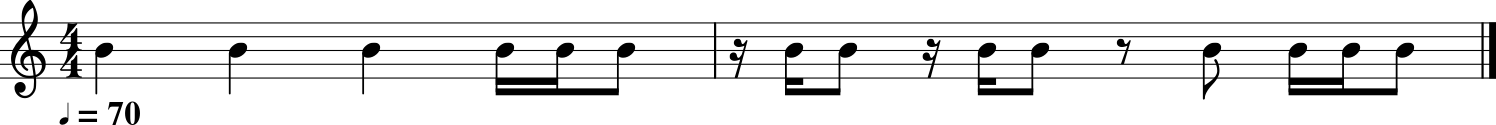

Total Q:  14
Total WNBD:  26
Total Pressing:  20.5
Total WNBD/Q 1.86


(14, 26, 20.5, 1.8571428571428572)

In [49]:
seviye = 1.5
opsiyon = 2

if(seviye==1 or seviye==2):
  if((opsiyon==1) or (opsiyon==2)):
    ritim_list = calculateritm_ops12(seviye, opsiyon, olcu_sayisi, zaman_isareti)
  elif (opsiyon==3) :
    ritim_list = calculateritm_ops3(seviye,  olcu_sayisi, zaman_isareti)
elif(seviye==1.5):
  ritim_list = calculateritm_sev15(opsiyon, olcu_sayisi, zaman_isareti)


print(ritim_list)
s = writescoremixed(ritim_list, zaman_isareti)
s.show()

s.write('musicxml.png')
fname = f"Ritim_Seviye_{seviye}_Opsiyon_{opsiyon}_{121:0=2d}.pdf"
s.write("musicxml.pdf", fp=fname)
#my_image = Image(filename=s.write("lily.png"))
#display(my_image)

table_scores(ritim_list)

#with open("aaaa.png", 'wb') as f:
#  f.write(my_image.data)

In [79]:
len(s)

19

ritim_list ['S1', 'S2', 'S3', 'S2', 'S10', 'S7', 'S6', 'S14']


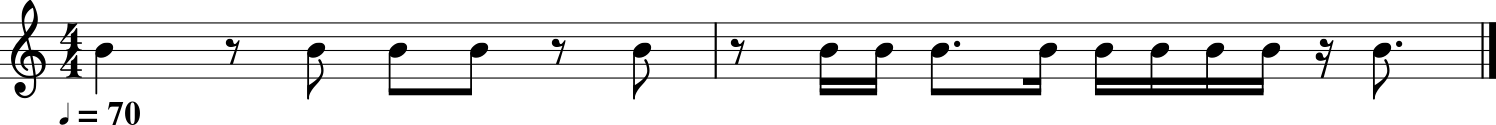

Total Q:  14
Total WNBD:  30
Total Pressing:  30.5
Total WNBD/Q 2.14
ritim_list ['S1', 'S1', 'S2', 'S2', 'S9', 'S3', 'S13', 'S13']


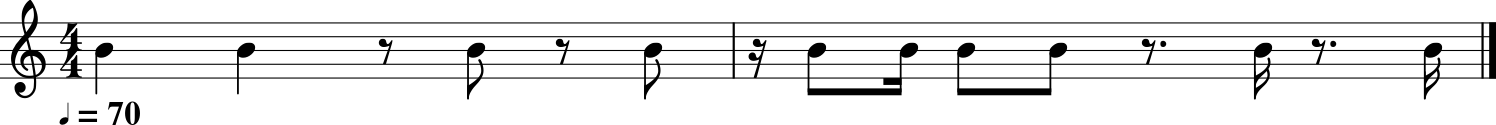

Total Q:  10
Total WNBD:  22
Total Pressing:  37.0
Total WNBD/Q 2.20
ritim_list ['S1', 'S4', 'S1', 'S4', 'S10', 'S10', 'S2', 'S1']


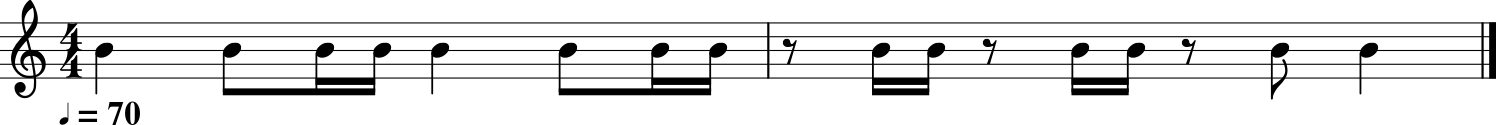

Total Q:  14
Total WNBD:  26
Total Pressing:  27.5
Total WNBD/Q 1.86
ritim_list ['S1', 'S3', 'S4', 'S1', 'S7', 'S11', 'S1', 'S1']


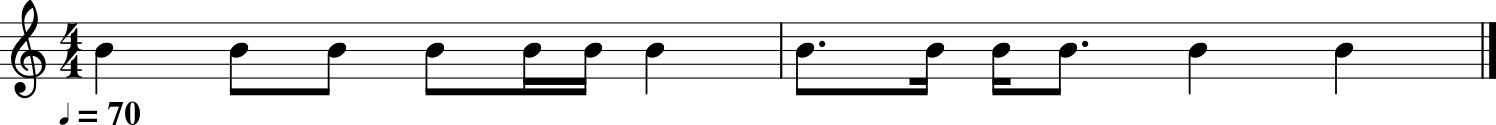

Total Q:  13
Total WNBD:  16
Total Pressing:  13.5
Total WNBD/Q 1.23
ritim_list ['S5', 'S5', 'S2', 'S1', 'S2', 'S14', 'S8', 'S14']


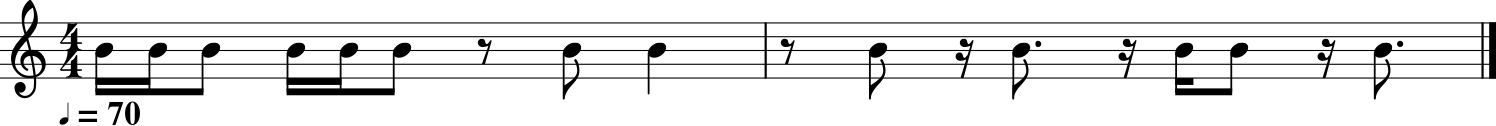

Total Q:  13
Total WNBD:  30
Total Pressing:  34.5
Total WNBD/Q 2.31
ritim_list ['S2', 'S5', 'S1', 'S2', 'S11', 'S9', 'S1', 'S9']


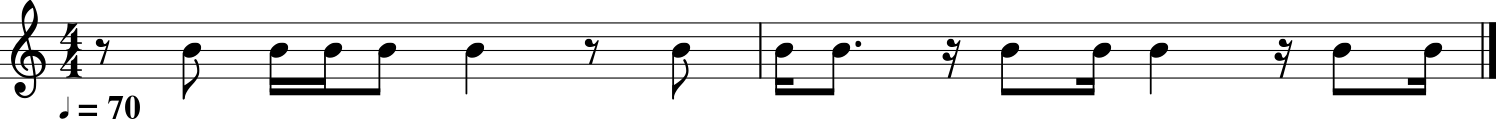

Total Q:  13
Total WNBD:  30
Total Pressing:  34.5
Total WNBD/Q 2.31
ritim_list ['S1', 'S5', 'S2', 'S2', 'S10', 'S9', 'S3', 'S14']


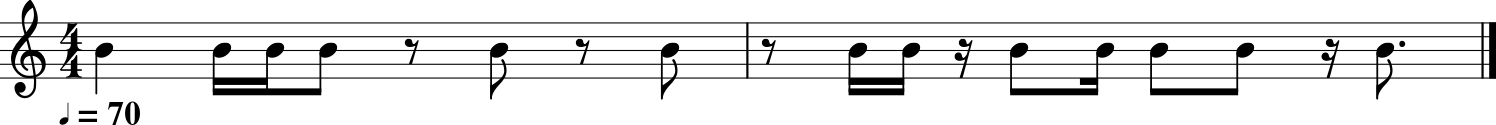

Total Q:  13
Total WNBD:  30
Total Pressing:  36.0
Total WNBD/Q 2.31
ritim_list ['S1', 'S1', 'S5', 'S1', 'S1', 'S5', 'S12', 'S13']


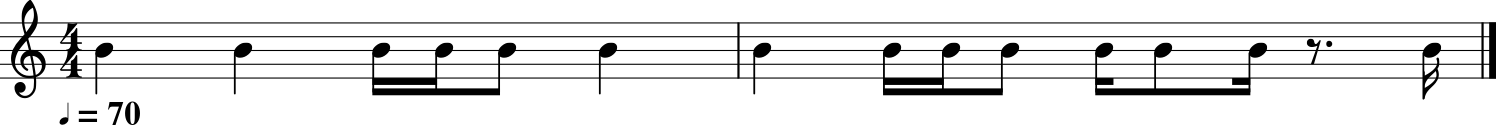

Total Q:  14
Total WNBD:  24
Total Pressing:  14.0
Total WNBD/Q 1.71
ritim_list ['S2', 'S2', 'S2', 'S3', 'S3', 'S13', 'S1', 'S4']


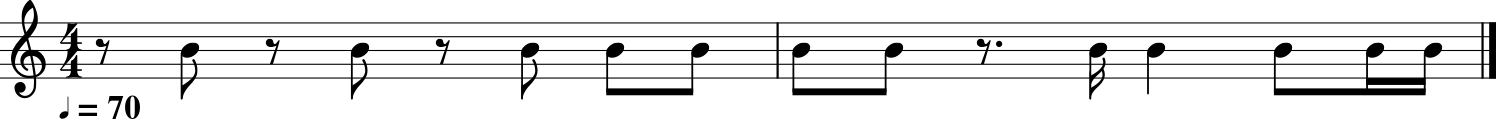

Total Q:  12
Total WNBD:  20
Total Pressing:  31.5
Total WNBD/Q 1.67
ritim_list ['S1', 'S2', 'S1', 'S5', 'S12', 'S10', 'S2', 'S2']


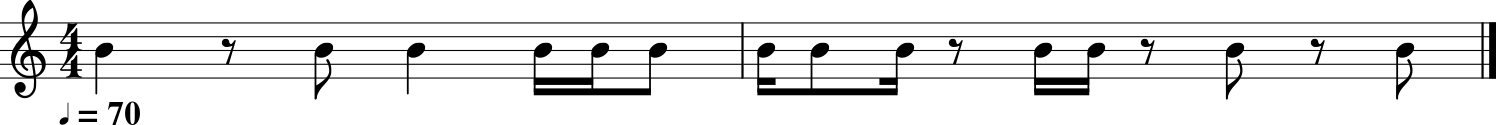

Total Q:  13
Total WNBD:  26
Total Pressing:  27.5
Total WNBD/Q 2.00
ritim_list ['S2', 'S2', 'S1', 'S5', 'S3', 'S14', 'S13', 'S14']


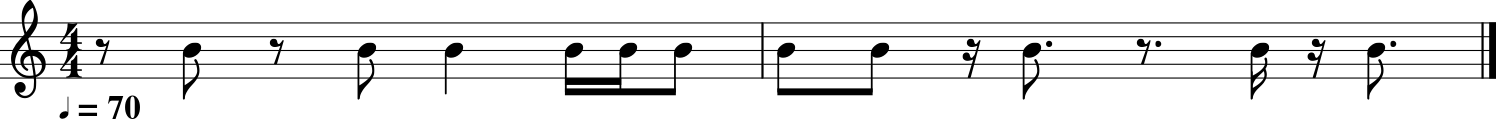

Total Q:  11
Total WNBD:  24
Total Pressing:  35.5
Total WNBD/Q 2.18
ritim_list ['S1', 'S2', 'S5', 'S1', 'S8', 'S9', 'S8', 'S11']


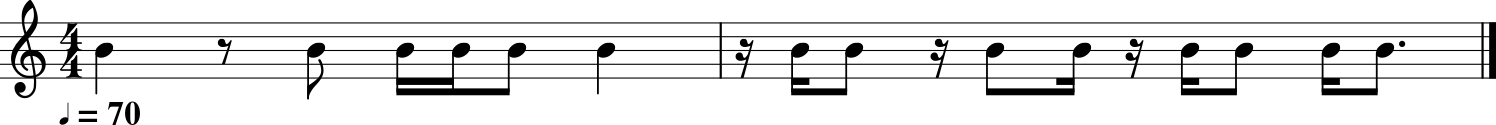

Total Q:  14
Total WNBD:  32
Total Pressing:  32.0
Total WNBD/Q 2.29
ritim_list ['S2', 'S3', 'S5', 'S1', 'S7', 'S8', 'S8', 'S1']


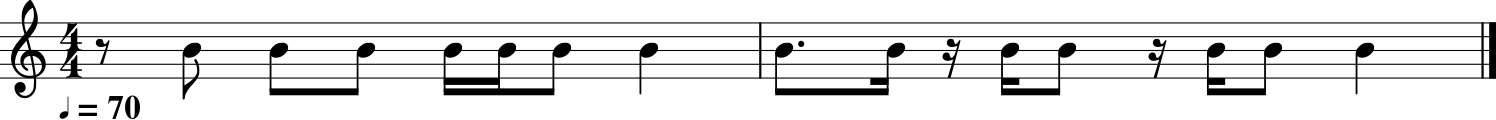

Total Q:  14
Total WNBD:  26
Total Pressing:  25.0
Total WNBD/Q 1.86
ritim_list ['S2', 'S2', 'S2', 'S2', 'S13', 'S1', 'S8', 'S9']


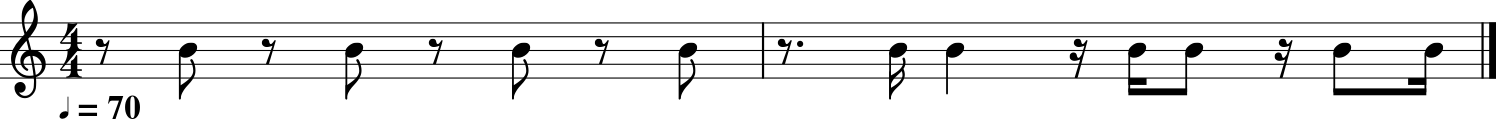

Total Q:  10
Total WNBD:  26
Total Pressing:  46.0
Total WNBD/Q 2.60
ritim_list ['S2', 'S1', 'S6', 'S2', 'S5', 'S1', 'S1', 'S3']


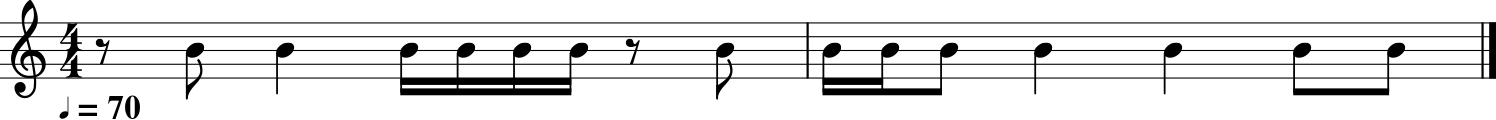

Total Q:  14
Total WNBD:  22
Total Pressing:  14.0
Total WNBD/Q 1.57
ritim_list ['S1', 'S5', 'S3', 'S1', 'S11', 'S7', 'S13', 'S14']


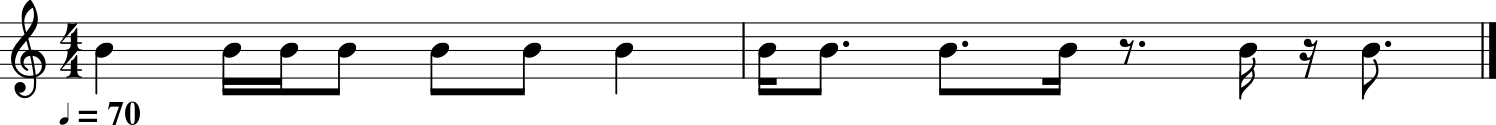

Total Q:  13
Total WNBD:  24
Total Pressing:  24.0
Total WNBD/Q 1.85
ritim_list ['S1', 'S5', 'S1', 'S1', 'S8', 'S13', 'S14', 'S4']


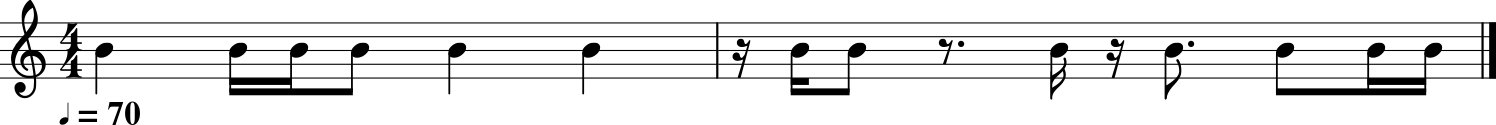

Total Q:  13
Total WNBD:  26
Total Pressing:  28.0
Total WNBD/Q 2.00
ritim_list ['S5', 'S2', 'S1', 'S2', 'S10', 'S2', 'S13', 'S10']


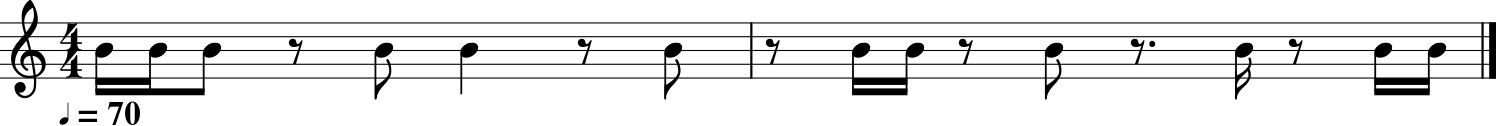

Total Q:  12
Total WNBD:  28
Total Pressing:  36.0
Total WNBD/Q 2.33
ritim_list ['S1', 'S5', 'S2', 'S2', 'S7', 'S1', 'S13', 'S8']


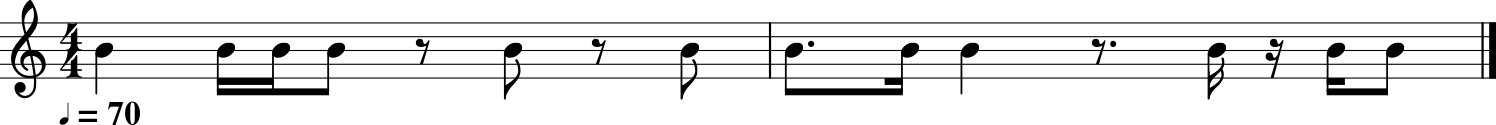

Total Q:  12
Total WNBD:  24
Total Pressing:  30.5
Total WNBD/Q 2.00
ritim_list ['S5', 'S1', 'S2', 'S2', 'S14', 'S8', 'S10', 'S10']


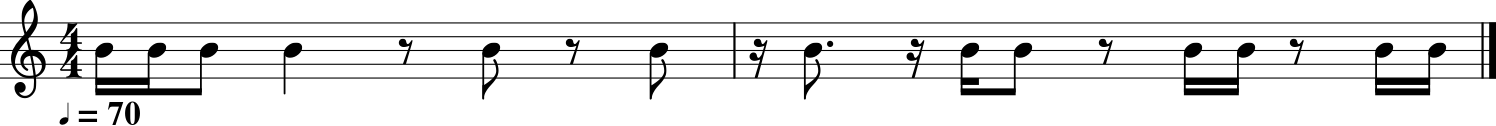

Total Q:  13
Total WNBD:  32
Total Pressing:  37.0
Total WNBD/Q 2.46
ritim_list ['S2', 'S6', 'S1', 'S2', 'S14', 'S7', 'S7', 'S8']


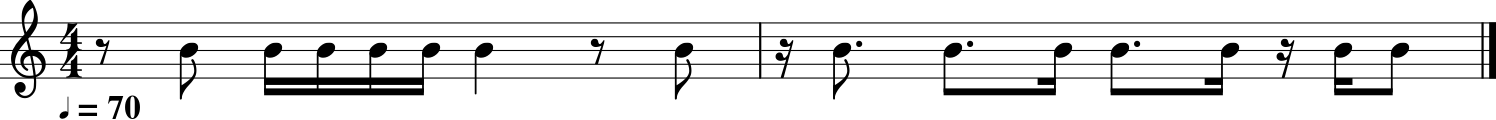

Total Q:  14
Total WNBD:  32
Total Pressing:  35.0
Total WNBD/Q 2.29
ritim_list ['S2', 'S5', 'S1', 'S1', 'S7', 'S10', 'S9', 'S3']


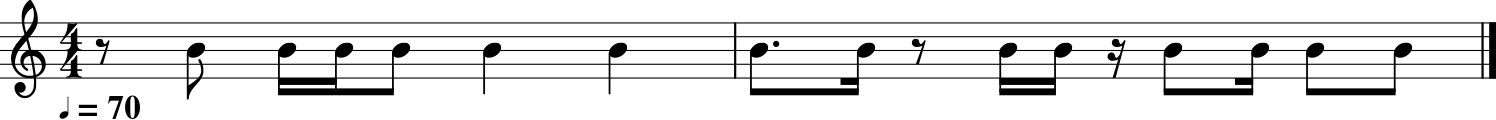

Total Q:  14
Total WNBD:  28
Total Pressing:  27.5
Total WNBD/Q 2.00
ritim_list ['S2', 'S2', 'S2', 'S4', 'S8', 'S3', 'S1', 'S14']


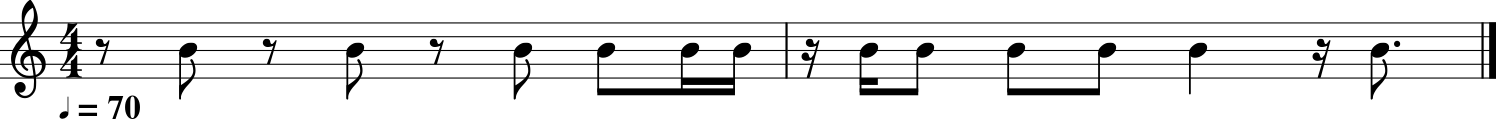

Total Q:  12
Total WNBD:  24
Total Pressing:  37.0
Total WNBD/Q 2.00
ritim_list ['S3', 'S1', 'S2', 'S2', 'S2', 'S3', 'S7', 'S1']


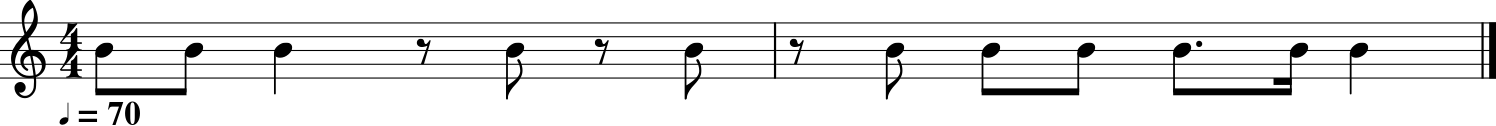

Total Q:  11
Total WNBD:  14
Total Pressing:  23.0
Total WNBD/Q 1.27
ritim_list ['S1', 'S5', 'S5', 'S1', 'S10', 'S14', 'S9', 'S14']


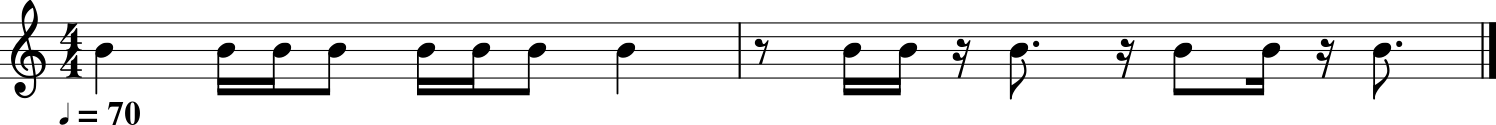

Total Q:  14
Total WNBD:  34
Total Pressing:  32.5
Total WNBD/Q 2.43
ritim_list ['S3', 'S3', 'S1', 'S3', 'S2', 'S8', 'S12', 'S2']


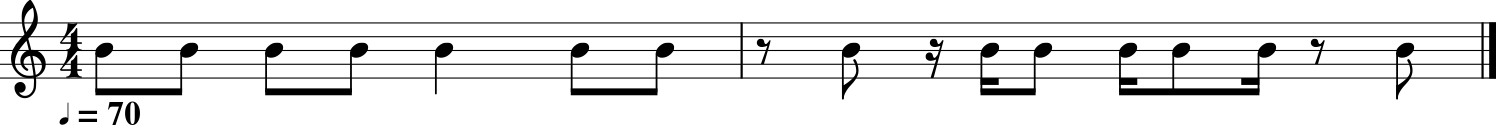

Total Q:  14
Total WNBD:  24
Total Pressing:  25.0
Total WNBD/Q 1.71
ritim_list ['S1', 'S2', 'S2', 'S1', 'S8', 'S4', 'S9', 'S2']


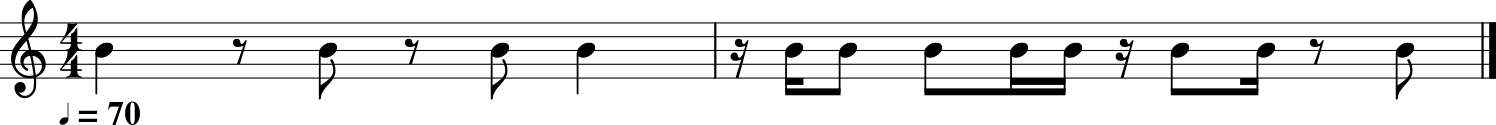

Total Q:  12
Total WNBD:  26
Total Pressing:  38.5
Total WNBD/Q 2.17
ritim_list ['S1', 'S2', 'S3', 'S5', 'S13', 'S2', 'S8', 'S3']


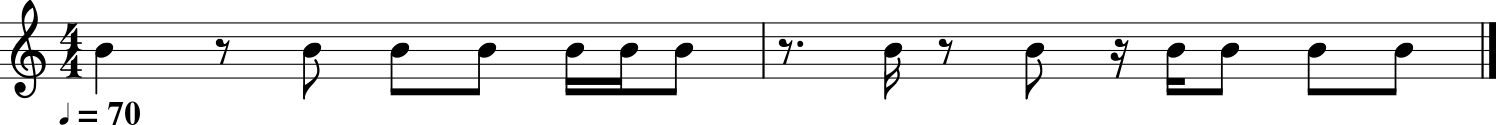

Total Q:  13
Total WNBD:  24
Total Pressing:  28.0
Total WNBD/Q 1.85
ritim_list ['S1', 'S4', 'S1', 'S4', 'S2', 'S13', 'S13', 'S7']


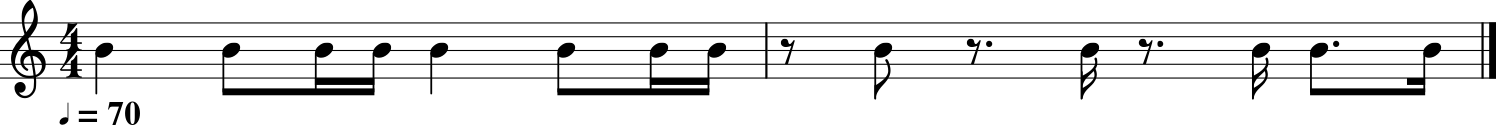

Total Q:  13
Total WNBD:  26
Total Pressing:  36.0
Total WNBD/Q 2.00
ritim_list ['S3', 'S1', 'S4', 'S2', 'S7', 'S8', 'S2', 'S14']


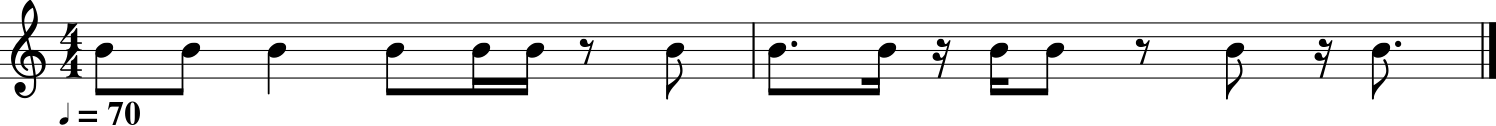

Total Q:  13
Total WNBD:  26
Total Pressing:  36.0
Total WNBD/Q 2.00
ritim_list ['S1', 'S1', 'S6', 'S2', 'S5', 'S7', 'S1', 'S1']


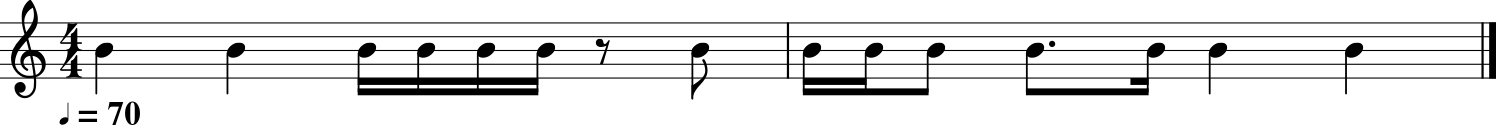

Total Q:  14
Total WNBD:  22
Total Pressing:  12.0
Total WNBD/Q 1.57
ritim_list ['S3', 'S1', 'S4', 'S2', 'S7', 'S9', 'S11', 'S1']


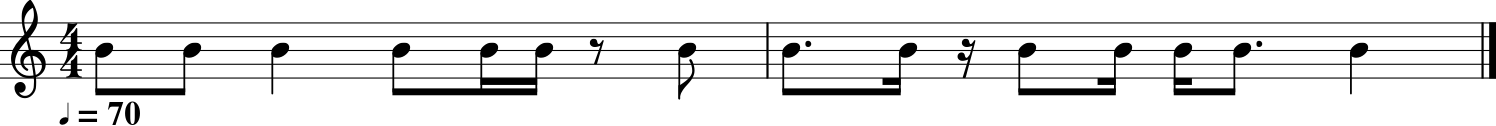

Total Q:  14
Total WNBD:  26
Total Pressing:  29.0
Total WNBD/Q 1.86
ritim_list ['S3', 'S2', 'S1', 'S1', 'S12', 'S3', 'S10', 'S14']


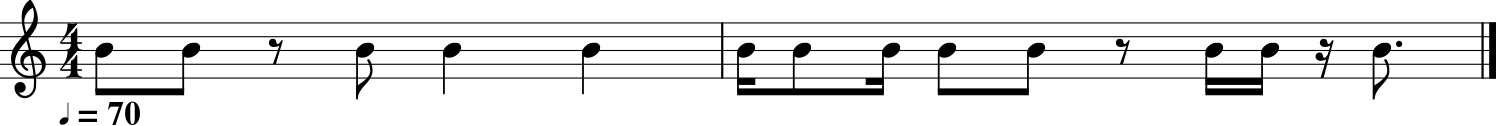

Total Q:  13
Total WNBD:  24
Total Pressing:  25.0
Total WNBD/Q 1.85
ritim_list ['S1', 'S5', 'S2', 'S1', 'S14', 'S1', 'S4', 'S9']


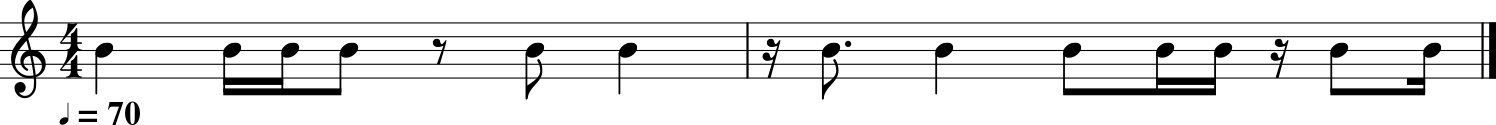

Total Q:  13
Total WNBD:  26
Total Pressing:  29.5
Total WNBD/Q 2.00
ritim_list ['S1', 'S3', 'S2', 'S2', 'S13', 'S10', 'S7', 'S12']


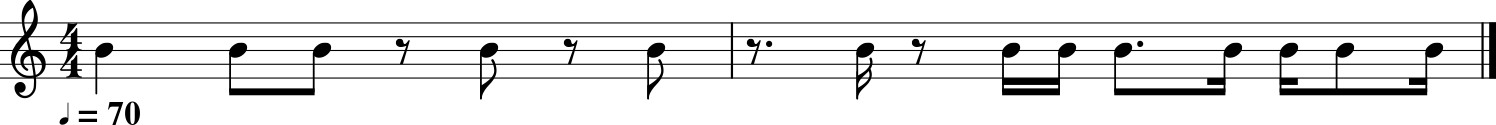

Total Q:  13
Total WNBD:  28
Total Pressing:  34.0
Total WNBD/Q 2.15
ritim_list ['S3', 'S6', 'S2', 'S1', 'S14', 'S14', 'S1', 'S13']


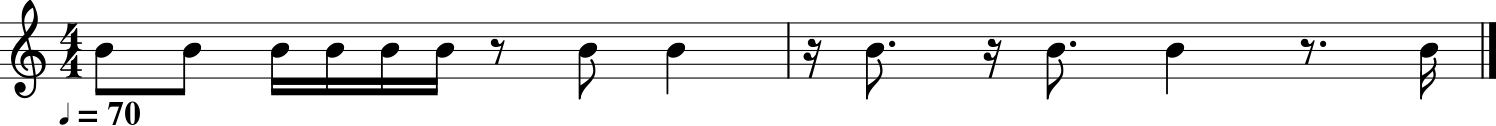

Total Q:  12
Total WNBD:  26
Total Pressing:  30.0
Total WNBD/Q 2.17
ritim_list ['S2', 'S1', 'S4', 'S2', 'S8', 'S14', 'S11', 'S3']


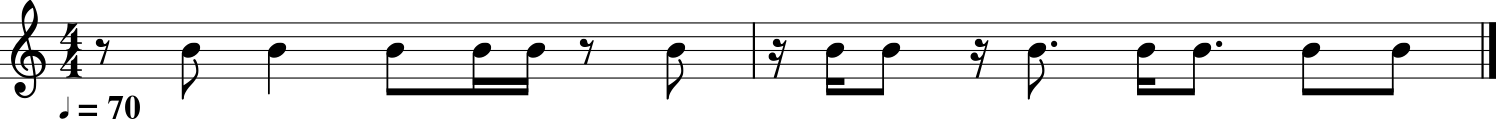

Total Q:  13
Total WNBD:  26
Total Pressing:  34.0
Total WNBD/Q 2.00
ritim_list ['S1', 'S2', 'S3', 'S2', 'S8', 'S7', 'S2', 'S11']


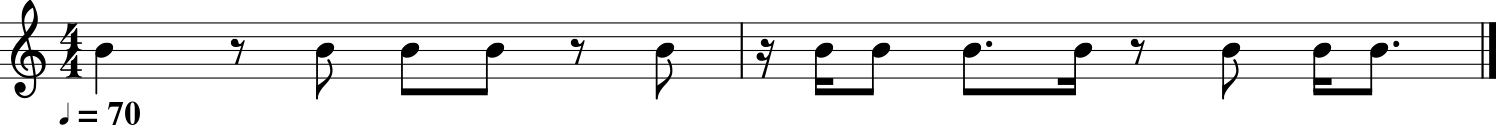

Total Q:  12
Total WNBD:  22
Total Pressing:  31.0
Total WNBD/Q 1.83
ritim_list ['S4', 'S3', 'S4', 'S2', 'S2', 'S13', 'S9', 'S2']


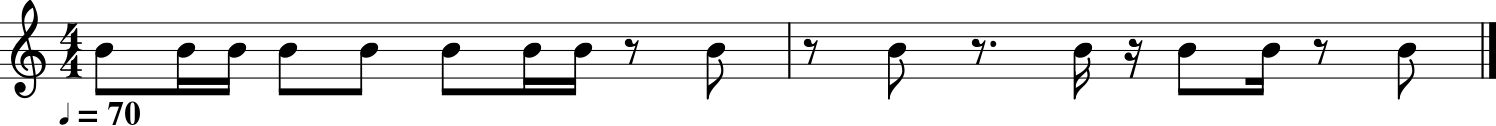

Total Q:  14
Total WNBD:  32
Total Pressing:  46.0
Total WNBD/Q 2.29
ritim_list ['S1', 'S3', 'S1', 'S1', 'S3', 'S3', 'S5', 'S2']


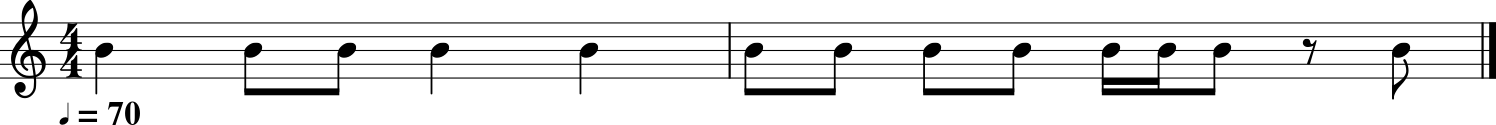

Total Q:  13
Total WNBD:  14
Total Pressing:  9.5
Total WNBD/Q 1.08
ritim_list ['S3', 'S2', 'S4', 'S3', 'S13', 'S1', 'S13', 'S14']


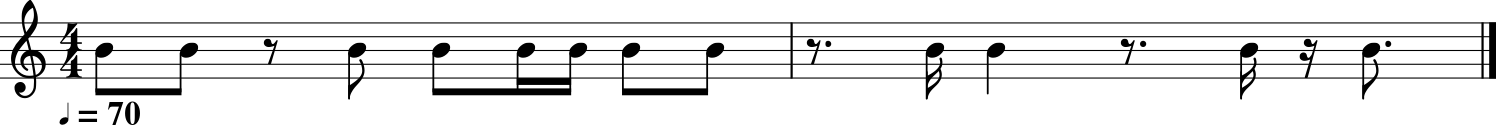

Total Q:  12
Total WNBD:  24
Total Pressing:  35.5
Total WNBD/Q 2.00
ritim_list ['S2', 'S1', 'S1', 'S4', 'S3', 'S6', 'S1', 'S14']


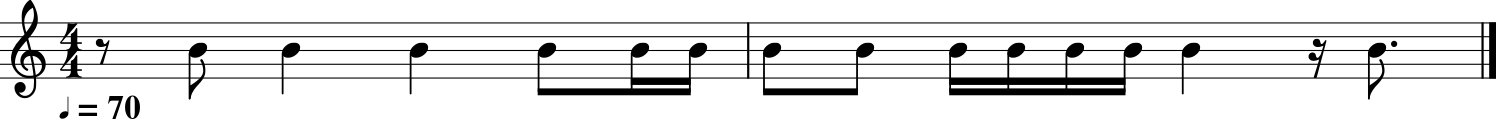

Total Q:  14
Total WNBD:  24
Total Pressing:  20.5
Total WNBD/Q 1.71
ritim_list ['S4', 'S2', 'S2', 'S5', 'S13', 'S1', 'S7', 'S9']


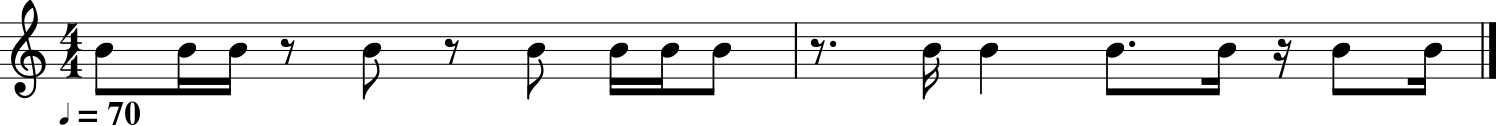

Total Q:  14
Total WNBD:  32
Total Pressing:  39.5
Total WNBD/Q 2.29
ritim_list ['S2', 'S1', 'S1', 'S4', 'S1', 'S10', 'S2', 'S9']


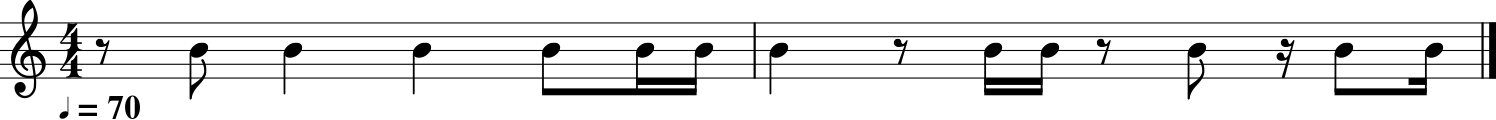

Total Q:  12
Total WNBD:  24
Total Pressing:  32.0
Total WNBD/Q 2.00
ritim_list ['S1', 'S3', 'S5', 'S1', 'S14', 'S9', 'S11', 'S2']


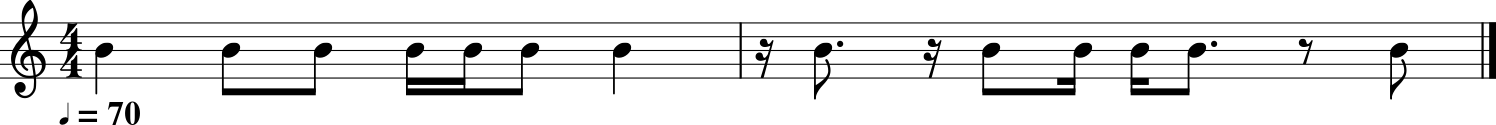

Total Q:  13
Total WNBD:  26
Total Pressing:  27.5
Total WNBD/Q 2.00
ritim_list ['S4', 'S2', 'S4', 'S2', 'S4', 'S2', 'S2', 'S1']


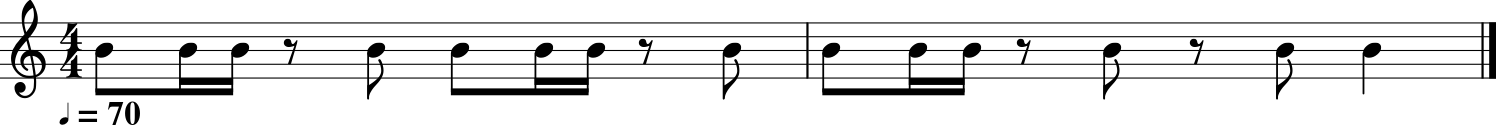

Total Q:  14
Total WNBD:  26
Total Pressing:  38.5
Total WNBD/Q 1.86
ritim_list ['S1', 'S5', 'S4', 'S2', 'S1', 'S11', 'S11', 'S1']


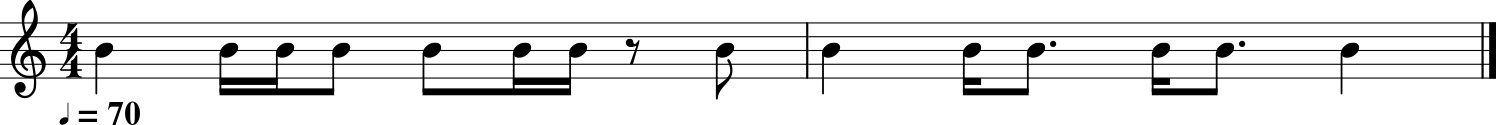

Total Q:  14
Total WNBD:  22
Total Pressing:  17.0
Total WNBD/Q 1.57
ritim_list ['S1', 'S2', 'S1', 'S5', 'S14', 'S5', 'S3', 'S3']


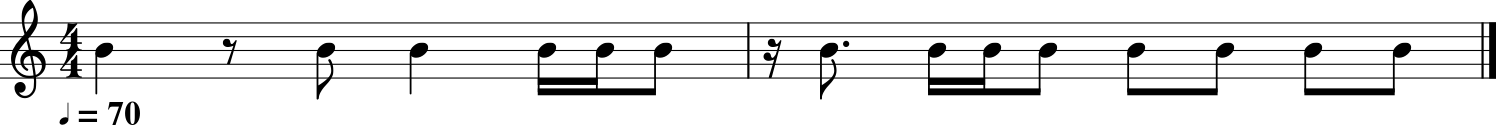

Total Q:  14
Total WNBD:  22
Total Pressing:  17.0
Total WNBD/Q 1.57
ritim_list ['S3', 'S1', 'S5', 'S2', 'S7', 'S9', 'S2', 'S3']


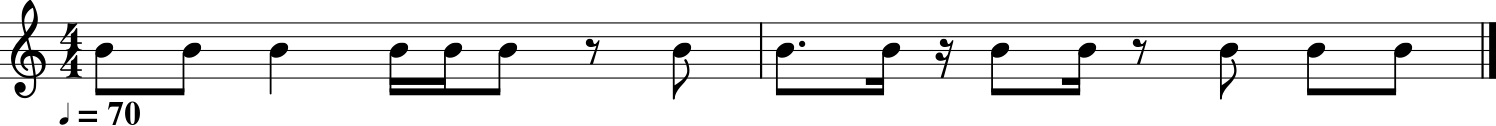

Total Q:  14
Total WNBD:  26
Total Pressing:  28.5
Total WNBD/Q 1.86
ritim_list ['S6', 'S1', 'S1', 'S2', 'S2', 'S4', 'S10', 'S1']


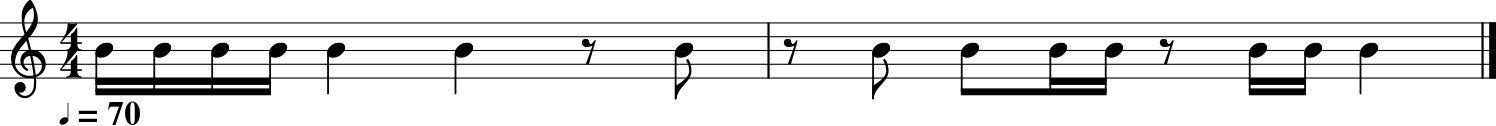

Total Q:  14
Total WNBD:  26
Total Pressing:  23.0
Total WNBD/Q 1.86


''

In [58]:
# Mixed Son

seviye = 1.5
opsiyon = 2


pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 15)

pdf.cell(200, 10, txt = f"Seviye {seviye} , Opsiyon: {opsiyon}", ln = 1, align = 'C')
pdf.cell(200, 10, "", ln=2, align = 'L')
ritim_lists = []

number_of_samples = 50

for i in range(number_of_samples):
  first_beat = True
  while(first_beat):
    if(seviye==1 or seviye==2):
      if((opsiyon==1) or (opsiyon==2)):
        ritim_list = calculateritm_ops12(seviye, opsiyon, olcu_sayisi,zaman_isareti)
      elif (opsiyon==3) :
        ritim_list = calculateritm_ops3(seviye,  olcu_sayisi,zaman_isareti)
    elif(seviye==1.5):
      ritim_list = calculateritm_sev15(opsiyon, olcu_sayisi, zaman_isareti)

    first_beat = firstbeatcontrol(seviye, opsiyon, ritim_list)

  print("ritim_list", ritim_list)

  s = writescoremixed(ritim_list, zaman_isareti)

  if(zaman_isareti==3):
   s.insert(0, meter.TimeSignature('3/4'))
  elif(zaman_isareti==4):
    s.insert(0, meter.TimeSignature('4/4'))
  elif(zaman_isareti==5):
    s.insert(0, meter.TimeSignature('5/4'))

  s.show()


  ritim_lists.append(ritim_list)
  s.write('musicxml.png')
  fname = f"Ritim_Seviye_{seviye}_Opsiyon_{opsiyon}_{(i+1):0=2d}.pdf"
  s.write("musicxml.pdf", fp=fname)

  sToStr = "-".join([str(elem) for elem in ritim_list])
  sToStr = str(i+1) + ": " + sToStr
  table_Q, table_WNBD, table_Pressing, table_WNBDQratio  = table_scores(ritim_list)
  pdf.cell(200, 10, txt = sToStr, ln = 2, align = 'L')
  #pdf.cell(200, 10, "", ln=2, align = 'L')
  sToStr = "Q: " + str(table_Q) + "  WNBD: "  + str(table_WNBD)  + " WNBD/Q: " + str("{:.2f}".format(table_WNBD/table_Q))  +  " Pressing: " + str("{:.2f}".format(table_Pressing))
  pdf.cell(200, 10, txt = sToStr, ln = 2, align = 'L')
  #pdf.cell(200, 10, "", ln=2, align = 'L')
  #pdf.cell(200, 10, "", ln=2, align = 'L')
  #pdf.cell(200, 10, "", ln=2, align = 'L')


  #  mf = midi.translate.streamToMidiFile(s)
    #mf.ticksPerQuarterNote = 512
  #  midifile_name = f"midi_seviye_1.5_opsiyon{my_opsiyon}_{i:0=2d}.mid"
  #  mf.open(midifile_name, 'wb')
  #  mf.write()
  #  mf.close()

  #

  #my_image = Image(str(s.write('lily.png')))
  #filename=c.write('lily.png')
  #Image(filename)

    #display(my_image)
  #pngfile_name = f"Ritm_Seviye_{seviye}_Opsiyon_{opsiyon}_{(i+1):0=2d}.png"

  #my_image = Image(filename=s.write("lily.png"))
  #my_image = Image(str(s.write('lily.png')))

  #with open(pngfile_name, 'wb') as f:
  #  f.write(my_image.data)

  #print("Y",i,90 + (i%5) * 50 )
  #pdf.image(pngfile_name, x=20, y=40 + ((i+1)%5) * 50, w=100)

fname_all = f"RitimmAll_Seviye_{seviye}_Opsiyon_{opsiyon}.pdf"
pdf.output(fname_all)